Importing Libraries

In [10]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import sys
import keras
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils.np_utils import normalize, to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dense, Flatten, Activation, Dropout
from tensorflow.keras.optimizers import SGD
%matplotlib inline

In [11]:
def summarize_diagnostics(history):
    # plot loss
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')
    # plt.close()

In [12]:
(trainX, trainY), (testX,testY) = cifar10.load_data()
trainX = trainX[:10000]/255
trainY = trainY[:10000]

testX = testX[:10000]/255
testY = testY[:10000]

# testY = to_categorical(trainY)
# trainY = to_categorical(trainY)

In [13]:
# trainX = np.array([list(cv2.resize(trainX[i], (128,128),  interpolation = cv2.INTER_CUBIC)) for i in range(len(trainX))])
image_shape = trainX[0].shape

In [14]:
trainX.shape

(10000, 32, 32, 3)

In [22]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=image_shape,activation = "relu", padding = "same"))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), activation = "relu", padding = "same"))

model.add(MaxPooling2D(strides = (1,1)))

model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), activation = "relu", padding = "same"))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), activation = "relu", padding = "same"))

model.add(MaxPooling2D(strides = (1,1)))

model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), activation = "relu", padding = "same"))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), activation = "relu", padding = "same"))

model.add(MaxPooling2D(strides = (1,1)))

model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), activation = "relu", padding = "same"))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), activation = "relu", padding = "same"))

model.add(MaxPooling2D(strides = (1,1)))

model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(512, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(10, activation="softmax"))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_38 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_31 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_39 (Bat  (None, 31, 31, 32)       128       
 chNormalization)                                                
                                                      

In [24]:
callback = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=3), keras.callbacks.TerminateOnNaN()]
history = model.fit(trainX, trainY, epochs=20, batch_size=32, validation_split=0.3, callbacks=callback)
# learning curves

Epoch 1/20
219/219 [==============================] - 685s 3s/step - loss: 1.6637 - accuracy: 0.4053 - val_loss: 3.9600 - val_accuracy: 0.1187
Epoch 2/20
219/219 [==============================] - 686s 3s/step - loss: 1.3096 - accuracy: 0.5271 - val_loss: 1.7461 - val_accuracy: 0.3923
Epoch 3/20
219/219 [==============================] - 683s 3s/step - loss: 1.0757 - accuracy: 0.6234 - val_loss: 1.7257 - val_accuracy: 0.4637
Epoch 4/20
219/219 [==============================] - 667s 3s/step - loss: 0.8963 - accuracy: 0.6819 - val_loss: 1.4951 - val_accuracy: 0.5643
Epoch 5/20
219/219 [==============================] - 645s 3s/step - loss: 0.6944 - accuracy: 0.7626 - val_loss: 1.2823 - val_accuracy: 0.5907
Epoch 6/20
219/219 [==============================] - 643s 3s/step - loss: 0.5103 - accuracy: 0.8287 - val_loss: 1.3842 - val_accuracy: 0.5797
Epoch 7/20
219/219 [==============================] - 643s 3s/step - loss: 0.3343 - accuracy: 0.8940 - val_loss: 1.2433 - val_accuracy: 0.6240

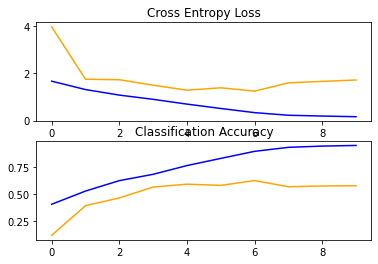

In [ ]:
summarize_diagnostics(history)

In [ ]:
# evaluate model
_, acc = model.evaluate(testX, testY)
# print('> %.3f' % (acc * 100.0))

2 	 2


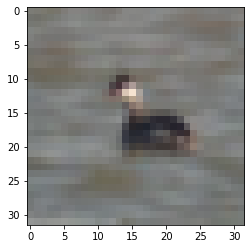

2 	 3


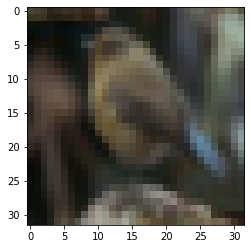

1 	 1


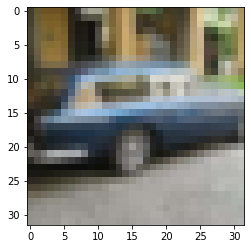

5 	 5


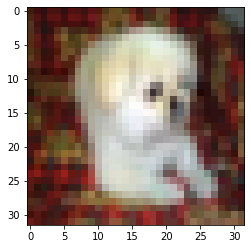

9 	 9


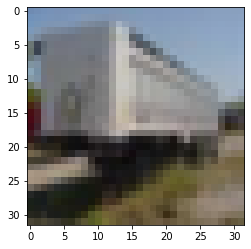

9 	 9


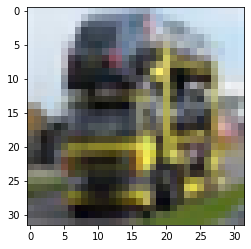

8 	 2


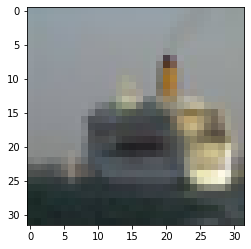

0 	 0


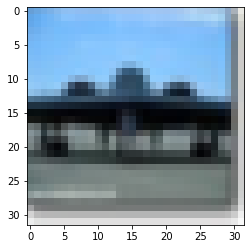

8 	 8


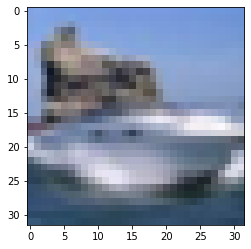

4 	 9


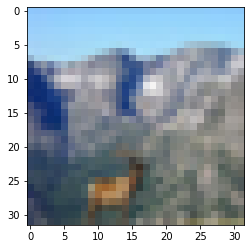

3 	 5


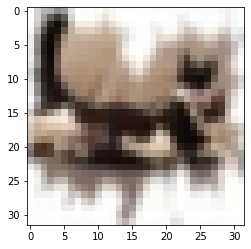

3 	 6


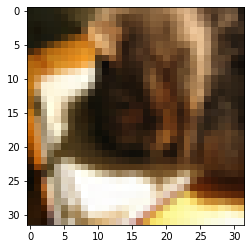

8 	 9


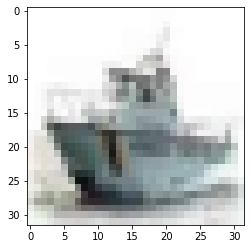

5 	 5


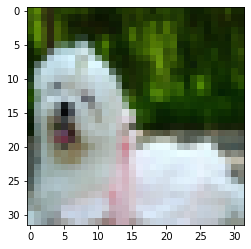

0 	 0


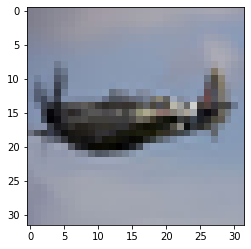

8 	 8


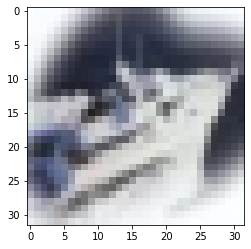

4 	 2


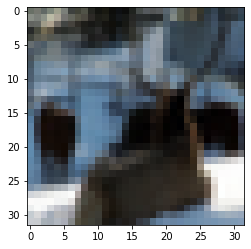

5 	 5


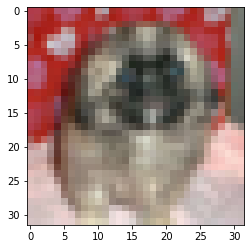

7 	 6


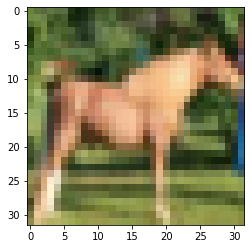

5 	 5


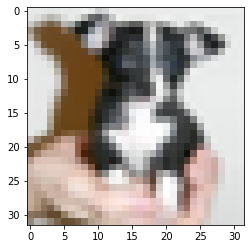

1 	 1


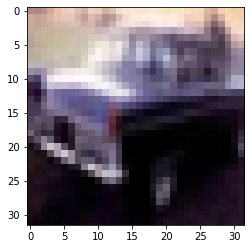

5 	 5


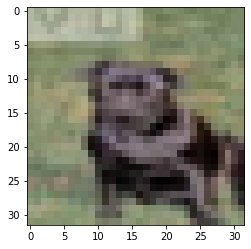

0 	 2


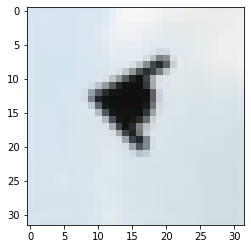

2 	 4


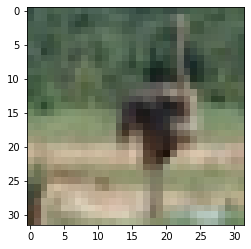

0 	 2


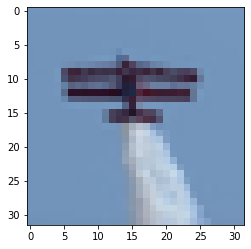

5 	 6


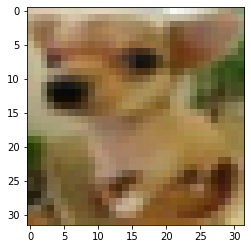

4 	 4


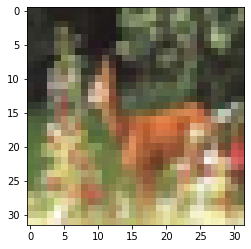

2 	 2


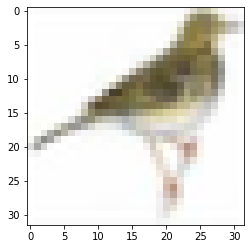

3 	 5


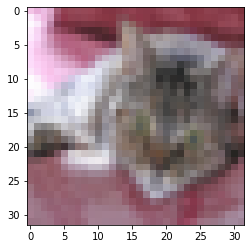

6 	 6


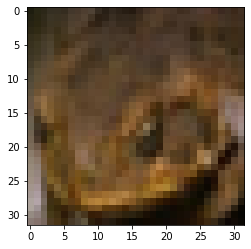

2 	 4


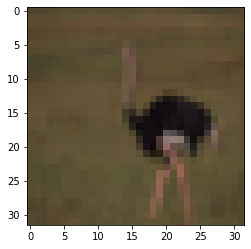

6 	 6


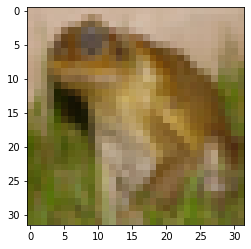

2 	 9


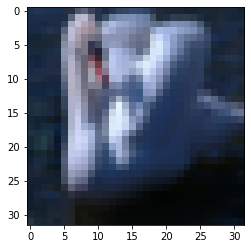

2 	 2


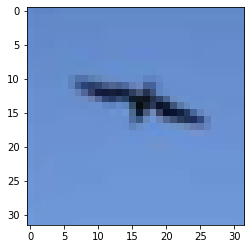

3 	 3


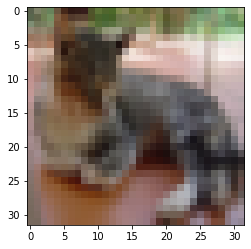

4 	 6


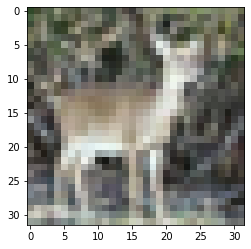

6 	 6


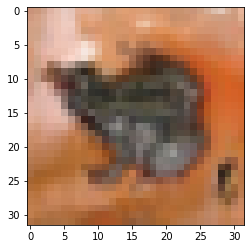

6 	 6


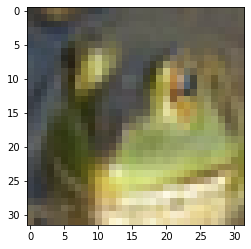

5 	 5


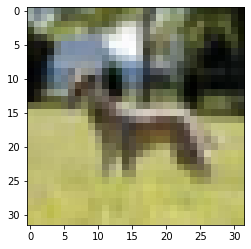

3 	 9


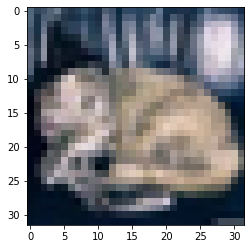

0 	 2


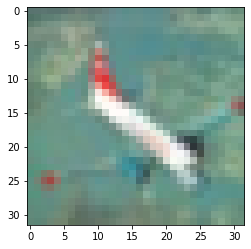

1 	 1


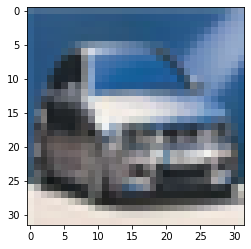

2 	 4


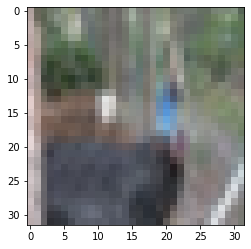

7 	 7


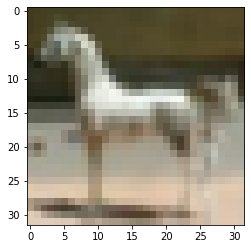

7 	 7


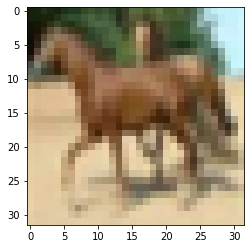

5 	 5


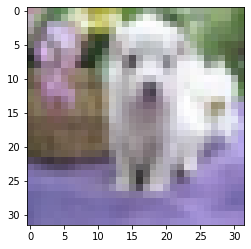

3 	 4


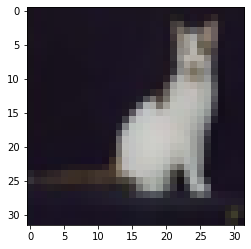

1 	 9


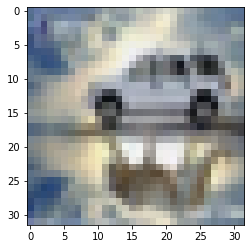

1 	 1


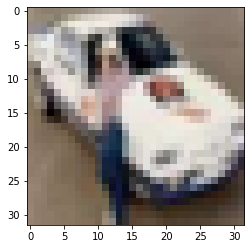

7 	 7


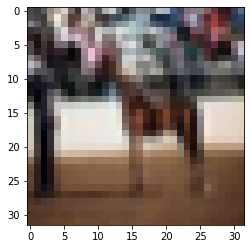

6 	 6


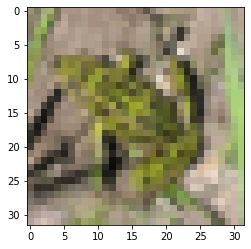

1 	 1


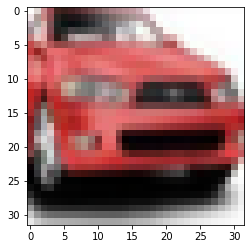

6 	 6


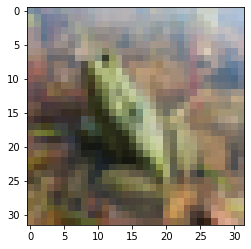

3 	 5


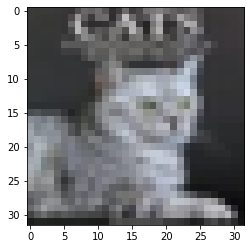

3 	 5


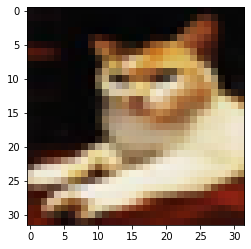

3 	 6


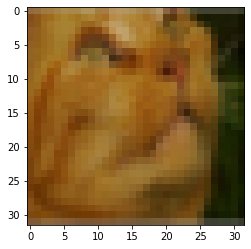

3 	 3


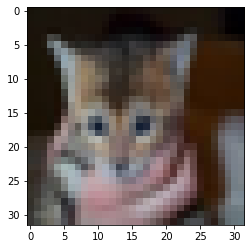

4 	 6


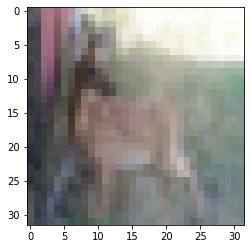

8 	 8


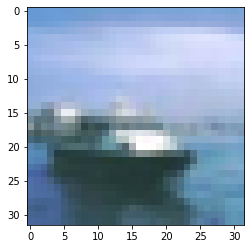

1 	 1


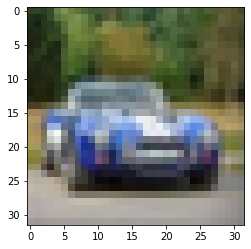

0 	 1


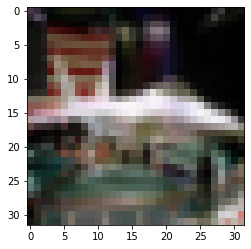

7 	 7


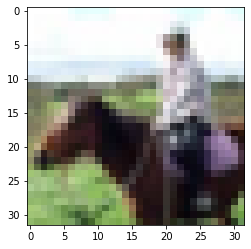

7 	 3


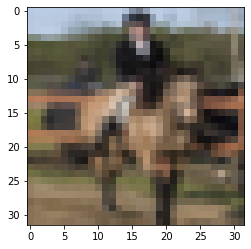

6 	 6


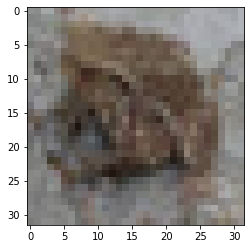

8 	 8


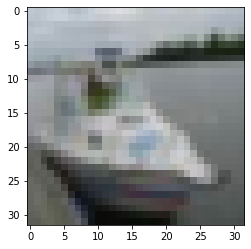

1 	 1


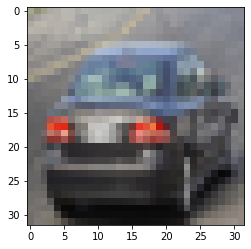

2 	 2


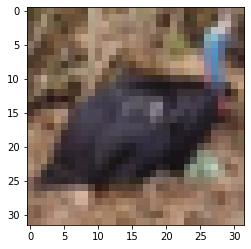

5 	 5


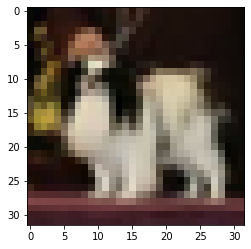

3 	 3


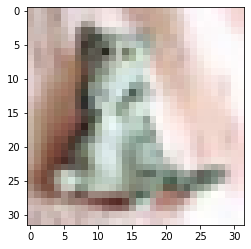

4 	 2


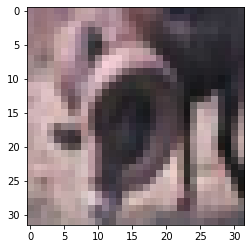

1 	 9


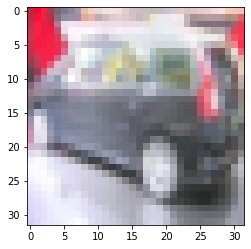

1 	 1


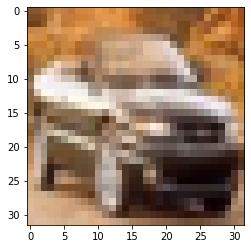

9 	 9


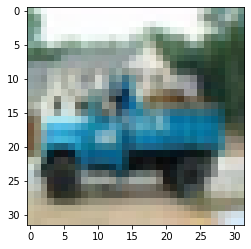

3 	 3


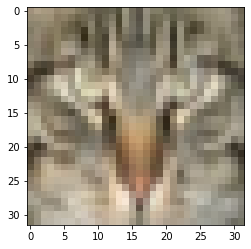

1 	 1


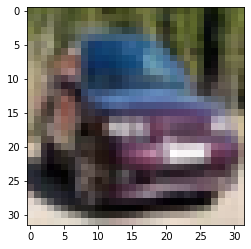

4 	 4


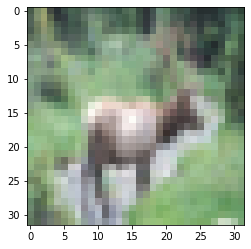

2 	 6


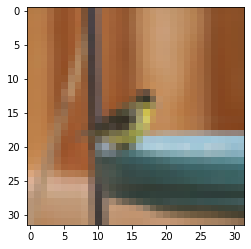

7 	 7


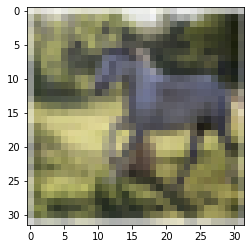

1 	 1


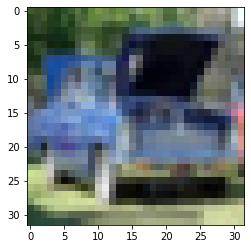

6 	 6


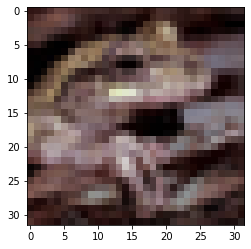

5 	 2


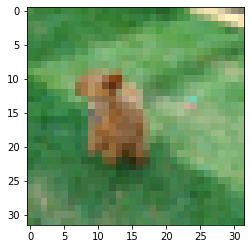

7 	 7


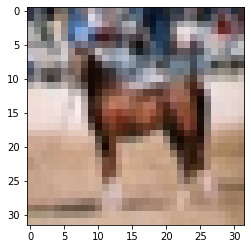

7 	 7


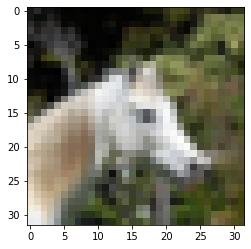

7 	 7


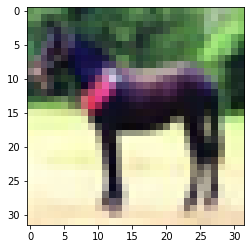

6 	 6


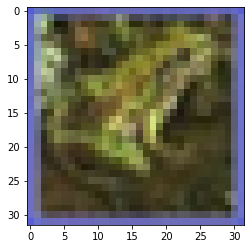

6 	 6


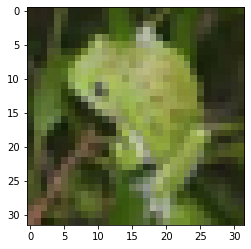

1 	 1


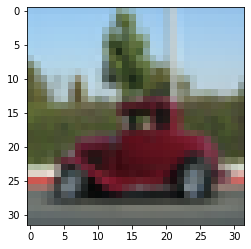

9 	 9


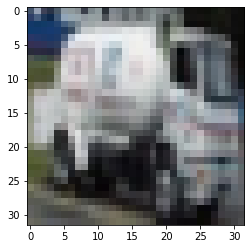

5 	 5


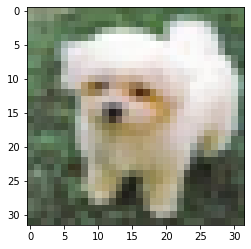

0 	 0


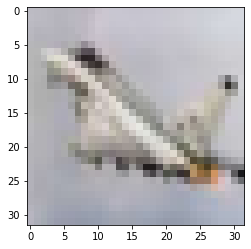

9 	 9


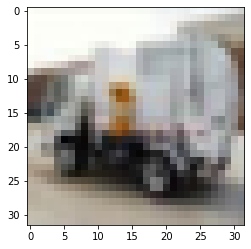

5 	 6


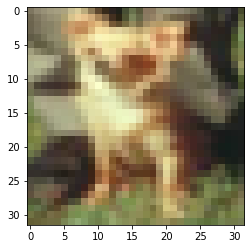

7 	 7


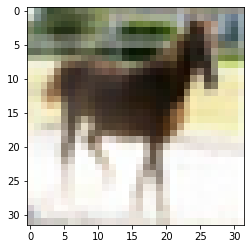

0 	 8


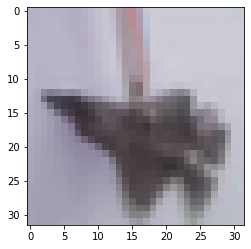

0 	 0


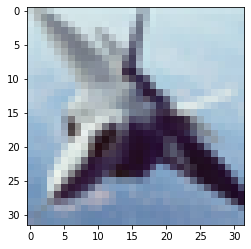

4 	 4


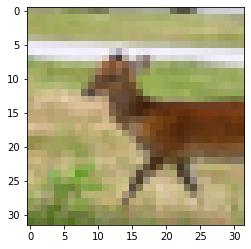

6 	 6


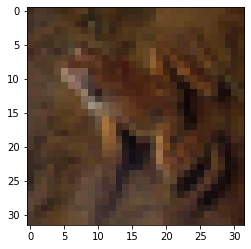

8 	 9


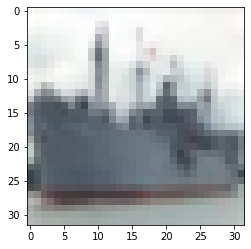

0 	 0


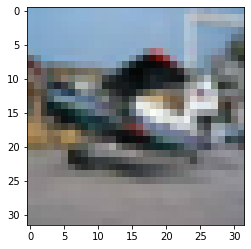

1 	 1


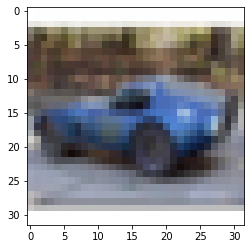

[5, 12, 4, 4, 3, 9, 11, 9, 4, 5] [10, 14, 10, 12, 8, 12, 11, 11, 7, 5] 100


In [ ]:
 import numpy as np
cnt = [0]*10
total_cnt = [0]*10
r1=1500
r2=r1+100
total = r2-r1
for i in range(r1,r2):
  plt.imshow(trainX[i])
  print(np.argmax(trainY[i]), "\t", np.argmax(model.predict(trainX[i:i+1])))
  if np.argmax(trainY[i])==np.argmax(model.predict(trainX[i:i+1])):
    cnt[np.argmax(trainY[i])]+=1
  total_cnt[np.argmax(trainY[i])]+=1
  plt.show()
print(cnt, total_cnt, total)

In [ ]:
[i*100//j for i,j in zip(cnt,total_cnt)]

[50, 85, 40, 33, 37, 75, 100, 81, 57, 100]

In [ ]:
model.save("my_model")

INFO:tensorflow:Assets written to: my_model/assets


In [ ]:
!zip -r '/content/my_model.zip' '/content/my_model'

  adding: content/my_model/ (stored 0%)
  adding: content/my_model/saved_model.pb (deflated 90%)
  adding: content/my_model/assets/ (stored 0%)
  adding: content/my_model/variables/ (stored 0%)
  adding: content/my_model/variables/variables.index (deflated 67%)
  adding: content/my_model/variables/variables.data-00000-of-00001 (deflated 10%)
  adding: content/my_model/keras_metadata.pb (deflated 95%)
